In [1]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [3]:
#Importing First Dataset
ipl_matches = pd.read_csv("matches.csv")
ipl_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
#Import Second Dataset
ipl_deliveries = pd.read_csv("deliveries.csv")
ipl_deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [5]:
#Data Preparation and Cleaning
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
ipl_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
ipl_matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [8]:
for col in ipl_matches:
    print(ipl_matches[col].unique())

[    1     2     3     4     5     6     7     8     9    10    11    12
    13    14    15    16    17    18    19    20    21    22    23    24
    25    26    27    28    29    30    31    32    33    34    35    36
    37    38    39    40    41    42    43    44    45    46    47    48
    49    50    51    52    53    54    55    56    57    58    59    60
    61    62    63    64    65    66    67    68    69    70    71    72
    73    74    75    76    77    78    79    80    81    82    83    84
    85    86    87    88    89    90    91    92    93    94    95    96
    97    98    99   100   101   102   103   104   105   106   107   108
   109   110   111   112   113   114   115   116   117   118   119   120
   121   122   123   124   125   126   127   128   129   130   131   132
   133   134   135   136   137   138   139   140   141   142   143   144
   145   146   147   148   149   150   151   152   153   154   155   156
   157   158   159   160   161   162   163   164   

In [9]:
#the first index that doesn't contain a NaN value 
ipl_matches.umpire3.first_valid_index()

636

In [10]:
#Confirming the first valid index
ipl_matches.loc[633:640]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
636,7894,2018,Mumbai,07/04/18,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,1,DJ Bravo,Wankhede Stadium,Chris Gaffaney,A Nanda Kishore,Anil Chaudhary
637,7895,2018,Mohali,08/04/18,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,KL Rahul,"Punjab Cricket Association IS Bindra Stadium, ...",Rod Tucker,K Ananthapadmanabhan,Nitin Menon
638,7896,2018,Kolkata,08/04/18,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,4,SP Narine,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi
639,7897,2018,Hyderabad,09/04/18,Rajasthan Royals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,S Dhawan,"Rajiv Gandhi International Stadium, Uppal",Nigel Llong,Vineet Kulkarni,O Nandan
640,7898,2018,Chennai,10/04/18,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,5,SW Billings,"MA Chidambaram Stadium, Chepauk",Anil Chaudhary,Chris Gaffaney,A Nanda Kishore


In [11]:
ipl_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
ipl_matches = ipl_matches.drop(columns=['umpire3'], axis=1)

In [13]:
ipl_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [14]:
#Replacing the Full names of IPL TEAMS by short names
ipl_matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [15]:
#Replacing the Full names of IPL TEAMS by short names
ipl_deliveries.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors','Rising Pune Supergiant']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW','RPS'],inplace=True)

In [16]:
# merging seasons column in deliveries dataset which will be helpful in further analysis for each season
ipl_deliveries = ipl_deliveries.merge(ipl_matches["season"], left_on=ipl_deliveries.index, right_on=ipl_matches.index)

In [17]:
#Exploratory Data Analysis(EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [18]:
#ANALYSIS-1
teams_per_season = ipl_matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner
2008    RR        13
        KXIP      10
        CSK        9
        DD         7
        MI         7
                  ..
2019    KKR        6
        KXIP       6
        SRH        6
        RCB        5
        RR         5
Name: winner, Length: 100, dtype: int64

In [19]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1

((2008, 'RR'), 13)
((2009, 'DD'), 10)
((2010, 'MI'), 11)
((2011, 'CSK'), 11)
((2012, 'KKR'), 12)
((2013, 'MI'), 13)
((2014, 'KXIP'), 12)
((2015, 'CSK'), 10)
((2016, 'SRH'), 11)
((2017, 'MI'), 12)
((2018, 'CSK'), 11)
((2019, 'MI'), 11)


C:\Users\AISHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


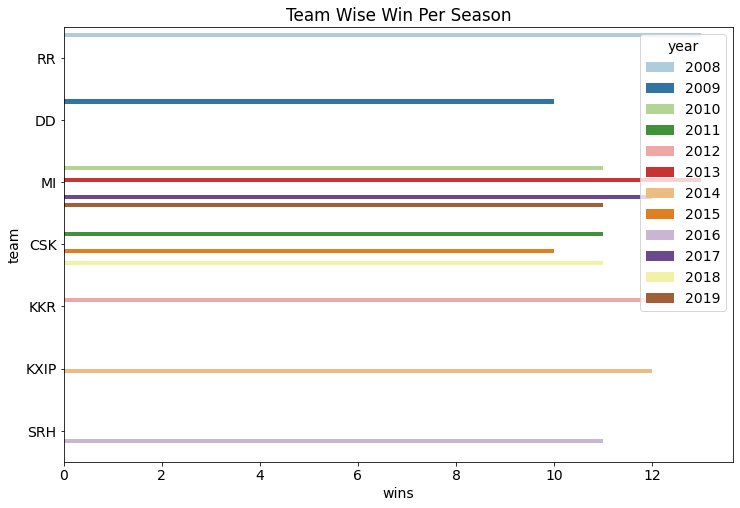

In [20]:
plt.title("Team Wise Win Per Season")
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired');

In [21]:
#ANALYSIS-2
venue_ser = ipl_matches['venue'].value_counts()

In [22]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

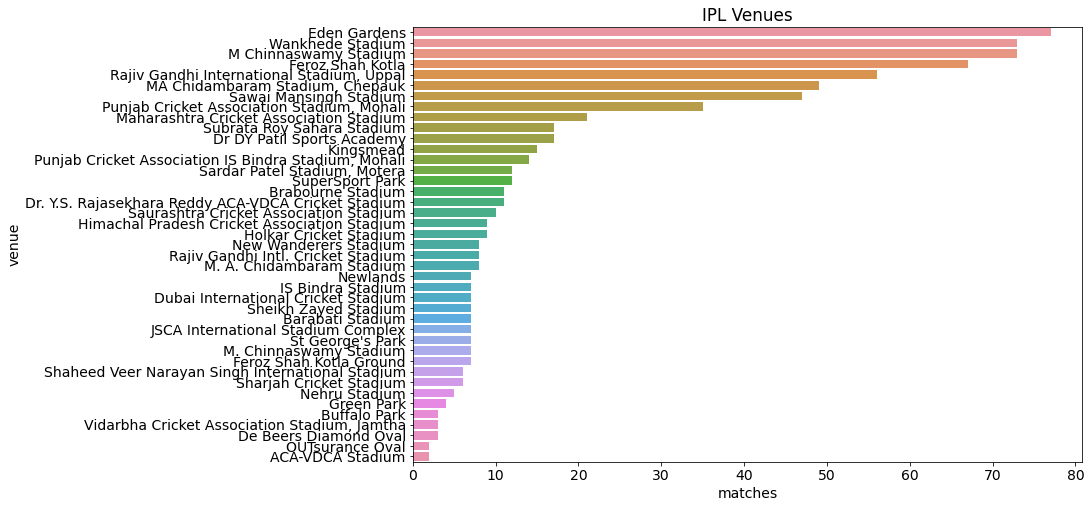

In [23]:
plt.title("IPL Venues")
sns.barplot(x='matches',y='venue', data=venue_df);

In [24]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [25]:
#ANALYSIS-3
team_wins_ser = ipl_matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [26]:
team_wins_df

,team,wins
0,MI,109
1,CSK,100
2,KKR,92
3,RCB,84
4,KXIP,82
5,RR,75
6,DD,67
7,SRH,58
8,DC,29
9,RPS,15


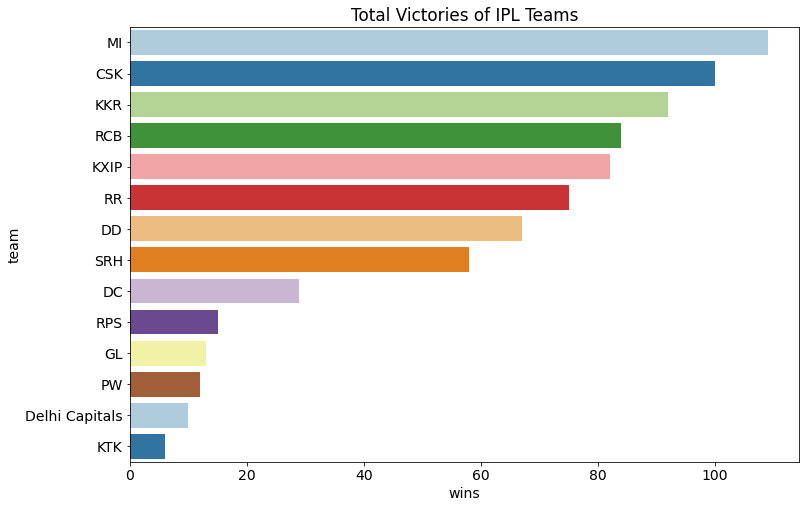

In [27]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

In [28]:
#ANALYSIS-4
mvp_ser = ipl_matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1

In [29]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,DA Warner,17
3,RG Sharma,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


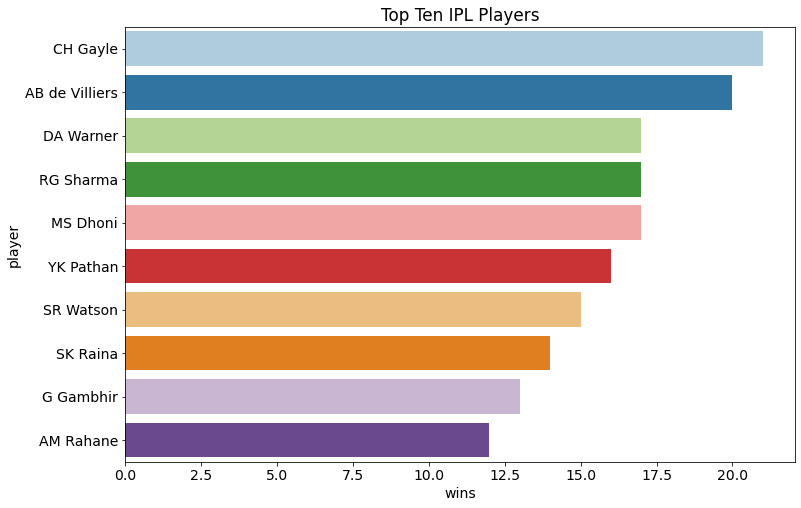

In [30]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

In [31]:
#ANALYSIS-5
toss_ser = ipl_matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True)

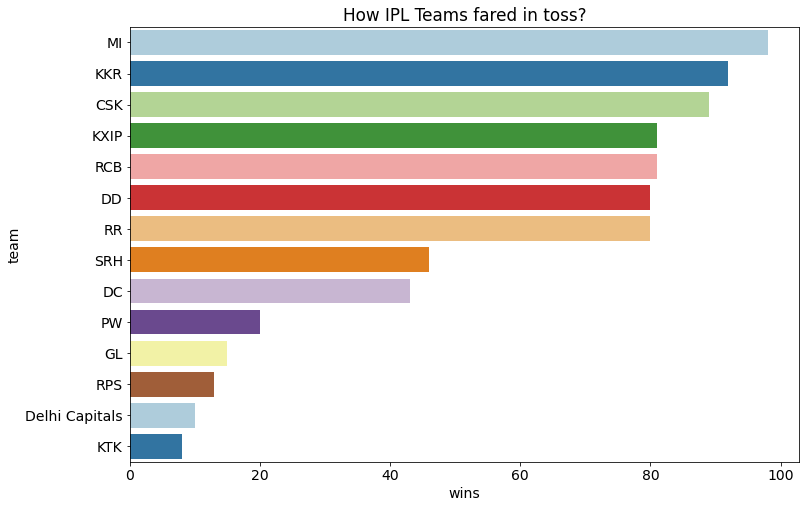

In [32]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');